In [1]:
import torch
import numpy as np
from tqdm import tqdm
from scipy.stats.distributions import chi2
from scipy.stats import pearsonr
import pickle

import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns
import random
import matplotlib.animation as animation
import sys, os

path = os.path.dirname(os.getcwd())
sys.path.append(path)

from utils.plots import *
from utils.funcs import *
from utils.visualize_network import *
from utils.visualize_hidden_network import *

from boltzmann_machines.RTRBM import RTRBM
from boltzmann_machines.RBM import RBM

from data.load_data import *
from data.mock_data import *
from data.reshape_data import *

# spikes, behavior, coordinates, df, stimulus = loaddata()

"""
to dump:

path = os.path.dirname(os.getcwd())
pickle.dump(rtrbm, open(path + '\\results\\RTRBMs\\RTRBMs1', 'wb'))

to load:

check1 = pickle.load(open(path + '\\results\\RTRBMs\\RTRBMs1', 'rb'))
"""

"\nto dump:\n\npath = os.path.dirname(os.getcwd())\npickle.dump(rtrbm, open(path + '\\results\\RTRBMs\\RTRBMs1', 'wb'))\n\nto load:\n\ncheck1 = pickle.load(open(path + '\\results\\RTRBMs\\RTRBMs1', 'rb'))\n"

In [6]:
path = r'C:\Users\CP\OneDrive\RU\Intern\rtrbm_master\data\Surrogate data'
generated = torch.load(path + '\Reconstructing an RTRBM by hidden trace initial', map_location=torch.device('cpu'))
trained = torch.load(path + '\Reconstructing an RTRBM by hidden trace trained', map_location=torch.device('cpu'))

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\CP\\OneDrive\\RU\\Intern\\rtrbm_master\\data\\Surrogate data\\Reconstructing an RTRBM by hidden trace initial'

In [19]:
hidden_trace = pickle.load(open(path + '\Hidden_trace_1', 'rb'))

In [1]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
cbar_ax = fig.add_axes([.91, .3, .03, .4])
sns.heatmap(generated.W, ax=axes[0, 0], cbar=True, cbar_ax=cbar_ax)
axes[0, 0].set_ylabel('generated RTRBM')
axes[0, 0].set_title('$W$')
sns.heatmap(trained.W, ax=axes[1, 0], cbar=False)
axes[1, 0].set_ylabel('trained RTRBM')
sns.heatmap(generated.W_acc, ax=axes[0, 1], cbar=False)
axes[0, 1].set_title('$W\'$')
sns.heatmap(trained.W_acc, ax=axes[1, 1], cbar=False)

NameError: name 'plt' is not defined

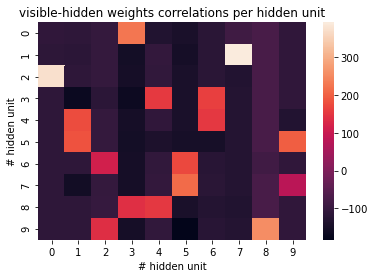

So, we have to shuffle the indexes of the weigths according to: [3. 7. 0. 6. 1. 9. 5. 5. 4. 8.]


In [236]:
N_H=10
corr = np.zeros((N_H, N_H))
shuffle_idx = np.zeros((N_H))
for i in range(N_H):
    for j in range(N_H):
        corr[i, j] = np.correlate(generated.W[i,:], -trained.W[j,:])
    shuffle_idx[i] = np.argmax(corr[i,:])

plt.figure()
sns.heatmap(corr)
plt.title('visible-hidden weights correlations per hidden unit')
plt.xlabel('# hidden unit')
plt.ylabel('# hidden unit')
plt.show()

print('So, we have to shuffle the indexes of the weigths according to: ' + np.array2string(shuffle_idx))

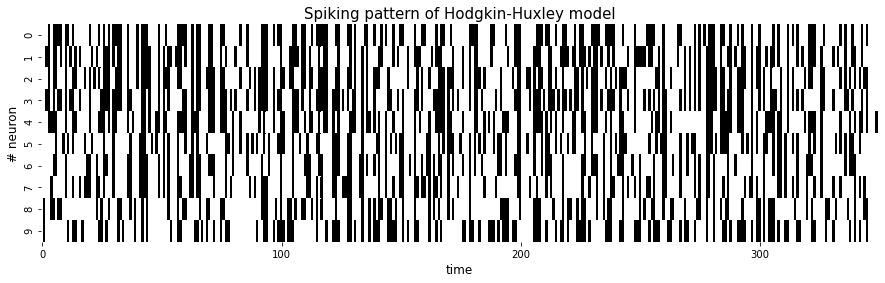

In [113]:
from matplotlib.colors import LinearSegmentedColormap
[N, C_E, C_I, EI, IE, resolution, T, dt, T_step, spikes_true, spikes_train, spike_thres, I_inj, V] = hidden_trace
plt.figure(figsize=(15,4))
colors = ['white', 'black']
cmap = LinearSegmentedColormap.from_list('', colors, 2)
sns.heatmap(spikes[:,:350] > spike_thres, cbar=False, cmap=cmap, vmin=0, vmax=1, xticklabels=100)
plt.title('Spiking pattern of Hodgkin-Huxley model', fontsize=15)
plt.xlabel('time', fontsize=12)
plt.ylabel('# neuron', fontsize=12)
plt.savefig(r'C:\Users\CP\OneDrive\RU\Intern\rtrbm_master\figures\hidden_trace_HH_model.png', dpi=500)

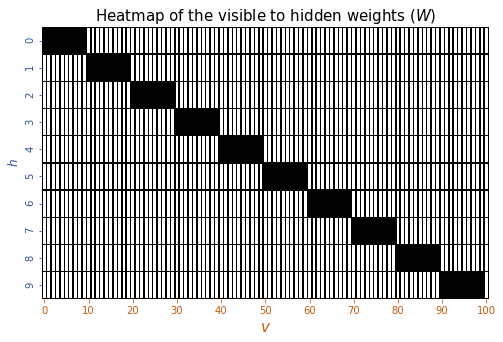

In [110]:
fig = plt.figure(figsize=(8,5))
ax = plt.gca()
colors = ['white', 'black']
cmap = LinearSegmentedColormap.from_list('', colors, 2)
sns.heatmap(torch.cat((generated.W, 10*torch.zeros(10, 1)), 1), cmap=cmap, cbar=False, xticklabels=10, linewidths=.5, linecolor='black')
plt.title('Heatmap of the visible to hidden weights ($W$)', fontsize=15)
plt.xlabel('$v$', fontsize=15)
ax.xaxis.label.set_color('#C55A11')
ax.tick_params(axis='x', colors='#C55A11')
plt.ylabel('$h$', fontsize=12)
ax.yaxis.label.set_color('#2F5597')
ax.tick_params(axis='y', colors='#2F5597')
plt.savefig(r'C:\Users\CP\OneDrive\RU\Intern\rtrbm_master\figures\heatmap_weights.png', dpi=500)

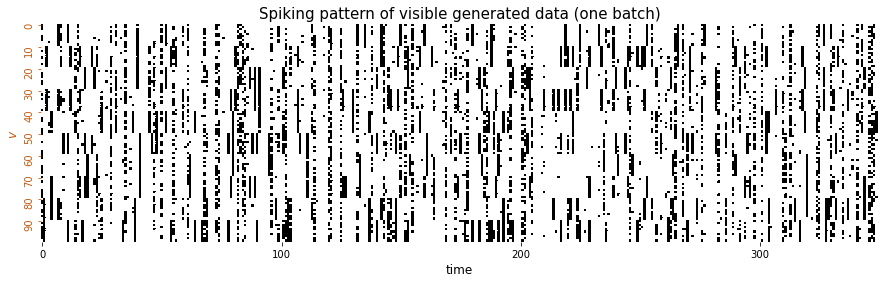

In [114]:
fig = plt.figure(figsize=(15,4))
ax = plt.gca()
sns.heatmap(trained.V[:,:,0], cbar=False, cmap=cmap, vmin=0, vmax=1, xticklabels=100, yticklabels=10)
plt.title('Spiking pattern of visible generated data (one batch)', fontsize=15)
plt.xlabel('time', fontsize=12)
plt.ylabel('$v$', fontsize=12)
ax.yaxis.label.set_color('#C55A11')
ax.tick_params(axis='y', colors='#C55A11')
plt.savefig(r'C:\Users\CP\OneDrive\RU\Intern\rtrbm_master\figures\visible_spiking_pattern.png', dpi=500)

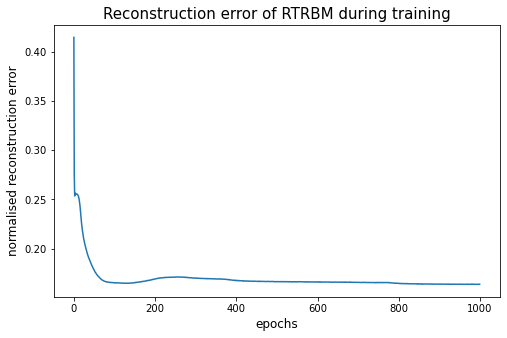

In [183]:
plt.figure(figsize=(8, 5))
plt.plot(trained.errors)
plt.title('Reconstruction error of RTRBM during training', fontsize=15)
plt.xlabel('epochs', fontsize=12)
plt.ylabel('normalised reconstruction error', fontsize=12)
plt.savefig(r'C:\Users\CP\OneDrive\RU\Intern\rtrbm_master\figures\reconstruction_error.png', dpi=500)

In [145]:
n_neurons_pop = 10
n_pop = 10
rads = torch.linspace(0, 2*torch.pi, 10)
mean_locations_pop = torch.zeros(n_pop, 2)
coordinates = torch.zeros(n_neurons_pop*n_pop, 2)
for i in range(n_pop):
    if i < 9:
        mean_locations_pop[i, :] = torch.tensor([torch.cos(rads[i]), torch.sin(rads[i])])
    else: 
        mean_locations_pop[i, :] = torch.tensor([0, 0])
    coordinates[n_neurons_pop * i:n_neurons_pop * (i + 1), :] = 0.15 * torch.randn(n_neurons_pop, 2) + mean_locations_pop[i]

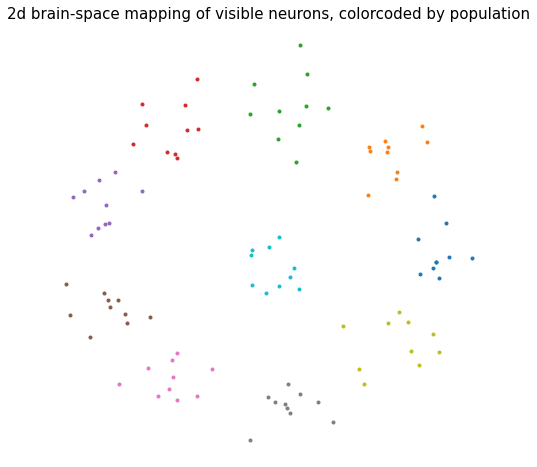

In [234]:
fig = plt.figure(figsize=(8,8))
ax = plt.gca()
for i in range(n_pop):
    plt.plot(coordinates[n_neurons_pop * i:n_neurons_pop * (i + 1), 0], coordinates[n_neurons_pop * i:n_neurons_pop * (i + 1), 1], '.')
plt.axis('off')
plt.title('2d brain-space mapping of visible neurons, colorcoded by population', fontsize=15)
plt.savefig(r'C:\Users\CP\OneDrive\RU\Intern\rtrbm_master\figures\brain.png', dpi=500)
plt.show()

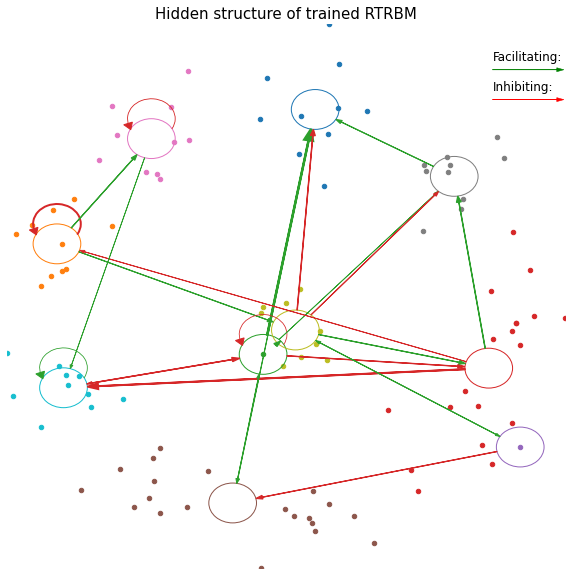

In [241]:
rf = get_hidden_mean_receptive_fields(-trained.W, coordinates, only_max_conn=True)

create_plot(-trained.W, trained.W_acc, rf,  coordinates, 0, weight_line_factor=0.25, hiddens_radius=0.1, hidden_weight_thresh=0.5)
plt.gca().arrow(.9, 1.1, .3, 0, lw=.5, color='red', length_includes_head=True, overhang=0, head_width=.02)
plt.gca().text(.9, 1.15, 'Inhibiting:', fontsize=12)
plt.gca().arrow(.9, 1.25, .3, 0, lw=.5, color='green', length_includes_head=True, overhang=0, head_width=.02)
plt.gca().text(.9, 1.3, 'Facilitating:', fontsize=12)
plt.axis('off')

plt.title('Hidden structure of trained RTRBM', fontsize=15)
plt.savefig(r'C:\Users\CP\OneDrive\RU\Intern\rtrbm_master\figures\hidden_structure.png', dpi=500)

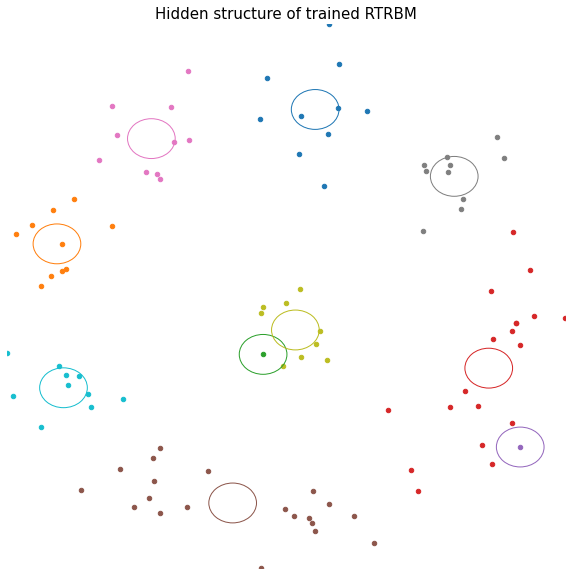

In [254]:
rf = get_hidden_mean_receptive_fields(-trained.W, coordinates, only_max_conn=True)

create_plot(-trained.W, trained.W_acc, rf,  coordinates, 0, weight_line_factor=0.25, hiddens_radius=0.1, hidden_weight_thresh=0.5)
plt.axis('off')

plt.title('Hidden structure of trained RTRBM', fontsize=15)
plt.savefig(r'C:\Users\CP\OneDrive\RU\Intern\rtrbm_master\figures\hidden_structure_no_arrows.png', dpi=500)

In [242]:
reshape = [3, 7, 0, 6, 1, 9, 5, 2, 4, 8]

In [188]:
IE

[array([9]),
 array([9]),
 array([9]),
 array([9]),
 array([9]),
 array([8]),
 array([8]),
 array([8]),
 array([8]),
 array([8])]

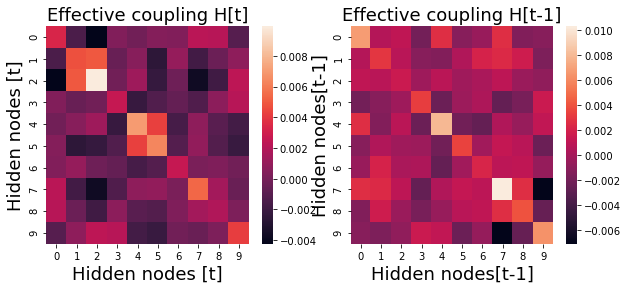

In [208]:
HH = trained.W_acc[reshape, :]
HH = HH[:, reshape]
VH = trained.W[reshape, :]
var_h_matrix = torch.reshape(torch.var(torch.tensor(spikes[:, :350] > spike_thres, dtype=torch.float), 1).repeat(HH.shape[1]), [HH.shape[1], HH.shape[0]]).T
Je_Hh = torch.mm(HH.T, HH * var_h_matrix)/VH.shape[0]**2
Je_hH = torch.mm(HH, HH.T * var_h_matrix)/VH.shape[0]**2

fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.heatmap(Je_Hh , ax = axes[0])
axes[0].set_ylabel("Hidden nodes [t]", fontsize=18)
axes[0].set_xlabel("Hidden nodes [t]", fontsize=18)
axes[0].set_title('Effective coupling H[t]', fontsize=18)
axes[0].tick_params(axis='both', which='major', labelsize=10)

sns.heatmap(Je_hH , ax = axes[1])
axes[1].set_ylabel("Hidden nodes[t-1]", fontsize=18)
axes[1].set_xlabel("Hidden nodes[t-1]", fontsize=18)
axes[1].set_title('Effective coupling H[t-1]', fontsize=18)
axes[1].tick_params(axis='both', which='major', labelsize=10)

<AxesSubplot:>

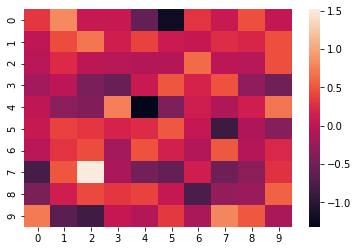

In [209]:
sns.heatmap(HH)

Text(373.36363636363626, 0.5, 'trained RTRBM')

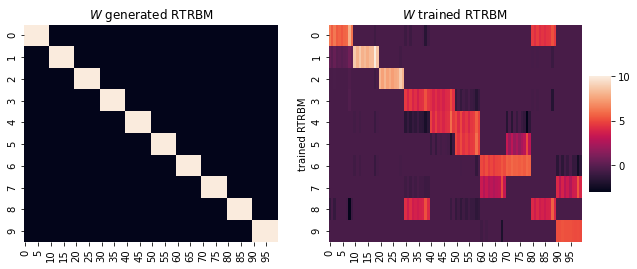

In [240]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
cbar_ax = fig.add_axes([.91, .3, .03, .4])
sns.heatmap(generated.W, ax=axes[0], cbar=True, cbar_ax=cbar_ax, xticklabels=10)
axes[0].set_title('$W$ generated RTRBM')
axes[1].set_title('$W$ trained RTRBM')
sns.heatmap(-VH, ax=axes[1], cbar=False, vmin=torch.min() xticklabels=10)
axes[1].set_ylabel('trained RTRBM')


In [252]:
import numpy as np
from math import cos, sin, atan2
from palettable.tableau import Tableau_10, Tableau_20
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, RegularPolygon
from numpy import radians as rad
import torch


def create_plot(VH, HH, rf, coords, dy, dx=0, markersize_visibles=20, hiddens_radius=0.02, weight_line_factor=1, hidden_weight_thresh=0):
    plt.figure(figsize=(10, 10))
    x_hidden_mean_receptive_fields = rf[:, 0]
    y_hidden_mean_receptive_fields = rf[:, 1]

    N_H = HH.shape[0]
    for h in range(N_H):
        draw_neuron(x_hidden_mean_receptive_fields[h], y_hidden_mean_receptive_fields[h], hiddens_radius, id=h)

    for h in range(N_H):
        for hh in range(N_H):
            if abs(HH[h, hh]) > hidden_weight_thresh:
                if h < hh:
                    dy = -dy
                    dx = -dx
                    line_between_two_neurons(x_hidden_mean_receptive_fields[h]+dx, y_hidden_mean_receptive_fields[h] + dy,
                                             x_hidden_mean_receptive_fields[hh]+dx, y_hidden_mean_receptive_fields[hh] + dy,
                                             hiddens_radius, weight=HH[h, hh], weight_line_factor=weight_line_factor)
                else:
                    dy = abs(dy)
                    dx = abs(dx)
                    line_between_two_neurons(x_hidden_mean_receptive_fields[h]+dx, y_hidden_mean_receptive_fields[h] + dy,
                                             x_hidden_mean_receptive_fields[hh]+dx, y_hidden_mean_receptive_fields[hh] + dy,
                                             hiddens_radius, weight=HH[h, hh], weight_line_factor=weight_line_factor)

    plot_VH_connections(plt.gca(), VH, coords, markersize=markersize_visibles)

    plt.gca().set_xlim(torch.min(coords[:, 0]), torch.max(coords[:, 0]))
    plt.gca().set_ylim(torch.min(coords[:, 1]), torch.max(coords[:, 1]))

    plt.plot(coords[:, 0], coords[:, 1], 'g.', markersize=1, zorder=-10)
    plt.xlabel('x', fontsize=12)
    plt.ylabel('y', fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=12)



def draw_neuron(x, y, neuron_radius, id=-1):
    # circle = plt.Circle((x, y), radius=neuron_radius, fill=False, color=Tableau_20.mpl_colors[2*id])
    # plt.gca().add_patch(circle)
    # plt.gca().text(x, y-(neuron_radius/4), str(id), size=neuron_radius*1000, ha='center')

    circle = plt.Circle((x, y), radius=neuron_radius, fill=False, color=Tableau_20.mpl_colors[2 * id])
    plt.gca().add_patch(circle)
    #plt.gca().text(x, y-0.03, str(id), size=neuron_radius * 1000, ha='center', fontsize=20)


def line_between_two_neurons(neuron1_x, neuron1_y, neuron2_x, neuron2_y, neuron_radius, weight=0.4,
                             weight_line_factor=1):
    angle = atan2(neuron2_x - neuron1_x, neuron2_y - neuron1_y)
    x_adjustment = neuron_radius * sin(angle)
    y_adjustment = neuron_radius * cos(angle)

    # assign colors to lines depending on the sign of the weight
    color = Tableau_10.mpl_colors[3]
    if weight > 0: color = Tableau_10.mpl_colors[2]

    # assign different linewidths to lines depending on the size of the weight
    abs_weight = abs(weight)
    linewidth = 2 * abs_weight * weight_line_factor

    # draw self-connecting arrow
    #if neuron1_x == neuron2_x:
    #    drawCirc(plt.gca(), neuron_radius * 2, neuron1_x, neuron1_y, -30, 230, color_=color, lw=3 * linewidth)

    # draw arrow
    #else:
       # plt.gca().arrow(neuron1_x + x_adjustment, neuron1_y + y_adjustment,
       #                 neuron2_x - neuron1_x - 2 * x_adjustment, neuron2_y - neuron1_y - 2 * y_adjustment,
       #                 lw=3 * linewidth, color=color, length_includes_head=True, head_width=linewidth/20, overhang=0)

        #style = "Simple, tail_width=0.5, head_width=4, head_length=8"
        #kw = dict(arrowstyle=style, color="k")

       # a1 = patches.FancyArrowPatch((float(neuron1_x + x_adjustment), float(neuron1_y + y_adjustment)),  # from
       #                              (float(neuron2_x - neuron1_x - 2 * x_adjustment),
       #                               float(neuron2_y - neuron1_y - 2 * y_adjustment)),  # to
       #                              **kw, connectionstyle="arc3, rad=0.2")

        #plt.gca().add_patch(a1)
    # plt.gca().add_line(line)


def drawCirc(ax, radius, centX, centY, angle_, theta2_, color_='black', lw=1):
    # ========Line
    if lw > 0.1:
        arc = Arc([centX, centY + radius / 2], radius, radius, angle=angle_, 
                  theta1=0, theta2=theta2_, capstyle='round', linestyle='-', lw=lw, color=color_)
        ax.add_patch(arc)

        # ========Create the arrow head
        endX = centX + (radius / 2) * np.cos(rad(theta2_ + angle_))  # Do trig to determine end position
        endY = centY + (radius / 2) * np.sin(rad(theta2_ + angle_))

        ax.add_patch(  # Create triangle as arrow head
            RegularPolygon(
                (endX, endY + radius / 2),  # (x,y)
                3,  # number of vertices
                radius / 9,  # radius
                rad(angle_ + theta2_),  # orientation
                color=color_
            )
        )
    # ax.set_xlim([centX-radius,centY+radius]) and ax.set_ylim([centY-radius,centY+radius])
    # Make sure you keep the axes scaled or else arrow will distort


def plot_VH_connections(ax, VH, coordinates, strong_thresh=0.5, markersize=2):
    N_H, N_V = VH.shape
    max_hidden_connection = torch.max(VH, 0)[1]

    for h in range(N_H):
        ax.scatter(coordinates[(max_hidden_connection == h) * (torch.abs(VH[h, :]) > strong_thresh), 0],
                   coordinates[(max_hidden_connection == h) * (torch.abs(VH[h, :]) > strong_thresh), 1],
                   color=Tableau_20.mpl_colors[(2 * h) % 20], s=markersize)

        ax.scatter(coordinates[(max_hidden_connection == h) * (torch.abs(VH[h, :]) < strong_thresh), 0],
                   coordinates[(max_hidden_connection == h) * (torch.abs(VH[h, :]) < strong_thresh), 1],
                   color=Tableau_20.mpl_colors[(2 * h + 1) % 20], s=markersize)
        ax.set_xlabel('x', fontsize=28)
        ax.set_ylabel('y', fontsize=28)
        ax.tick_params(axis='both', which='major', labelsize=20)



In [260]:
rbm = torch.load(open(path + '/Reconstructing an RBM by hidden trace trained, HT=1, mom=0.7, wc=0.0002, lr=1e-3, lr_end=1e-5, start_decay=200, sp=3e-5, x=2, 1', 'rb'), map_location=torch.device('cpu'))

In [388]:
trained.device = 'cpu'
rbm.device = 'cpu'
v_rbm = torch.zeros(100, 10, 1000)
v_rtrbm = torch.zeros(100, 10, 1000)
h_rtrbm = torch.zeros(10, 10, 1000)
h_rbm = torch.zeros(10, 10, 1000)

for i in tqdm(range(1000)):
    v_rbm[:, :, i], h_rbm[:, :, i] = rbm.sample(trained.V[:, 0, 0], chain=10, pre_gibbs_k=500, gibbs_k=100, disable_tqdm=True)
    v_rtrbm[:, :, i], h_rtrbm[:, :, i] = trained.sample(trained.V[:, 0, 0], chain=10, pre_gibbs_k=500, gibbs_k=100, disable_tqdm=True)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:01<00:00,  2.37it/s]


In [389]:
v_rbm_flat = v_rbm.reshape(100, 10000)
v_rtrbm_flat = v_rtrbm.reshape(100, 10000)
h_rtrbm_flat = h_rtrbm.reshape(10, 10000)
h_rbm_flat = h_rbm.reshape(10, 10000)

In [390]:
V_data_mean = torch.mean(V, 1)
V_sampled_mean_rbm = torch.mean(v_rbm_flat, 1)
V_sampled_mean_rtrbm = torch.mean(v_rtrbm_flat, 1)

Text(0, 0.5, 'sampled')

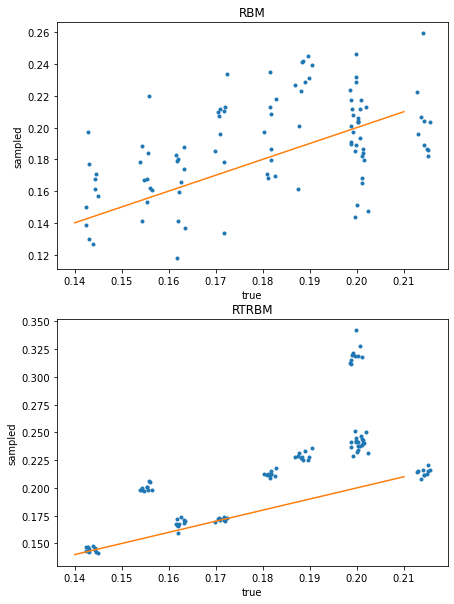

In [391]:
fig, axes = plt.subplots(2, 1, figsize=(7,10))
axes[0].plot(V_data_mean, V_sampled_mean_rbm, '.')
axes[0].plot([.14, .21], [.14, .21], '-')
axes[0].set_title('RBM')
axes[0].set_xlabel('true')
axes[0].set_ylabel('sampled')
axes[1].plot(V_data_mean, V_sampled_mean_rtrbm, '.')
axes[1].plot([.14, .21], [.14, .21], '-')
axes[1].set_title('RTRBM')
axes[1].set_xlabel('true')
axes[1].set_ylabel('sampled')

In [290]:
def plot_moments(V_data, H_data, V_samples, H_samples):
    fig, axes = plt.subplots(1, 3, figsize=(15, 10))

    means_V_data, means_V_samples, means_H_data, means_H_samples, pw_VV_data, \
    pw_VV_samples, pw_HH_data, pw_HH_samples, pw_VH_data, pw_VH_samples, \
    r_V, r_H, r_VV, r_VH, r_HH = moments(V_data, H_data, V_samples, H_samples)

    ax = axes[0]
    ax.plot(means_V_data, means_V_samples, 'bo')
    ax.plot([-1, 1], [-1, 1], ':', color='k')
    ax.set_xlim([torch.min(means_V_data) - 0.1, torch.max(means_V_data) + 0.1])
    ax.set_ylim([torch.min(means_V_samples) - 0.1, torch.max(means_V_samples) + 0.1])
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlabel("Training data")
    ax.set_ylabel("Sampled data")
    ax.set_title("Means V-Units, r-value: {}".format(r_V))

    ax = axes[1]
    ax.plot(means_H_data, means_H_samples, 'o', color='orange')
    ax.plot([-1, 1], [-1, 1], ':', color='k')
    ax.set_xlim([torch.min(means_H_data) - 0.1, torch.max(means_H_data) + 0.1])
    ax.set_ylim([torch.min(means_H_samples) - 0.1, torch.max(means_H_samples) + 0.1])
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlabel("Training data")
    ax.set_ylabel("Sampled data")
    ax.set_title("Means H-Units, r-value: {}".format(r_H))

    ax = axes[2]
    ax.plot(pw_VH_data, pw_VH_samples, 'go')
    ax.plot([-1, 1], [-1, 1], ':', color='k')
    ax.set_xlim([torch.min(pw_VH_data) - 0.1, torch.max(pw_VH_data) + 0.1])
    ax.set_ylim([torch.min(pw_VH_samples) - 0.1, torch.max(pw_VH_samples) + 0.1])
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlabel("Training data")
    ax.set_ylabel("Sampled data")
    ax.set_title("Pairwise moments V/H units, r-value: {}".format(r_VH))


    fig.tight_layout()
    plt.show()

In [286]:
torch.tensor(spikes[:,:30000] > spike_thres, dtype=torch.float).shape

torch.Size([10, 1000])

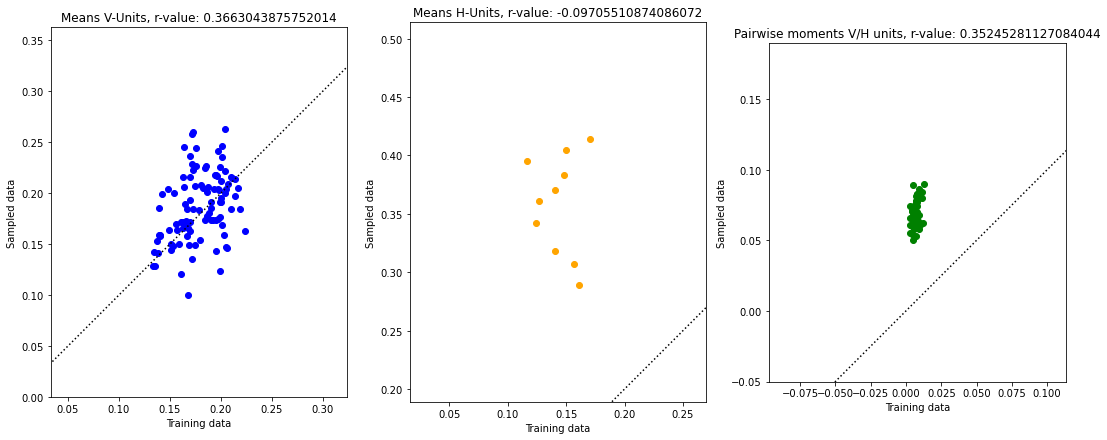

In [309]:
plot_moments(V[:,:1000], torch.tensor(spikes[:,:350] > spike_thres, dtype=torch.float), v_rbm_flat, (h_rbm_flat-1)*-1)

In [1]:
hidden_trace = pickle.load(open(path + '\Hidden_trace_6', 'rb'))

NameError: name 'pickle' is not defined

In [316]:
[N, C_E, C_I, EI, IE, resolution, T, dt, T_step, spikes_true, spikes_train, spike_thres, I_inj, V] = hidden_trace

In [350]:
torch.mean(torch.tensor(spikes_train > 0.09, dtype=torch.float), 1)

tensor([0.4851, 0.4758, 0.3218, 0.3253, 0.4867, 0.3559, 0.4770, 0.4583, 0.2992,
        0.3167])

In [366]:
R = trained.visible_to_expected_hidden(torch.tensor(V))
H, _ = trained.visible_to_hidden(torch.tensor(V), R)

<ipython-input-366-ddb7f0f9a58a>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  R = trained.visible_to_expected_hidden(torch.tensor(V))
<ipython-input-366-ddb7f0f9a58a>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  H, _ = trained.visible_to_hidden(torch.tensor(V), R)


In [396]:
trained1 = torch.load(path + '\Reconstructing an RTRBM by hidden trace trained, HT=1, mom=0.7, wc=0.0002, lr=1e-3, lr_end=1e-5, start_decay=200, sp=3e-5, x=2, 2', map_location=torch.device('cpu'))

In [409]:
trained.learn(n_epochs=1, batchsize=100, lr=5e-3, mom=0, wc=0)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:48<00:00, 48.91s/it]


In [426]:
data = trained.V[:,:,:100]

In [427]:
from boltzmann_machines.RTRBM import RTRBM
rtrbm = RTRBM(data, N_H=10)

In [432]:
spikes_train.shape

(10, 10000)

In [435]:
gen = RTRBM(trained.V, N_H=10)

In [441]:
gen.W = generated.W.to(torch.device('cuda'))
gen.b_V = torch.zeros(1, 100).to(torch.device('cuda'))

In [443]:
data = gen.hidden_to_visible(torch.tensor(spikes_train > spike_thres, dtype=torch.float, device=torch.device('cuda')))

In [447]:
train, test = train_test_split(data)

In [461]:
rtrbm = RTRBM(train, N_H=10)

In [463]:
rtrbm.learn(n_epochs=1000, mom=0.7, wc=0.0002, lr=1e-3, lr_end=1e-5, start_decay=200, sp=3e-5, x=2, batchsize=10)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [39:24<00:00,  2.36s/it]


In [532]:
rtrbm1 = RTRBM(train, N_H=15)
rtrbm1.learn(n_epochs=1000, mom=0.7, wc=0.0002, lr=1e-3, lr_end=1e-4, start_decay=200, sp=3e-5, x=2, batchsize=10)

  1%|▋                                                                                | 8/1000 [00:20<43:12,  2.61s/it]


KeyboardInterrupt: 

In [472]:
rtrbm2 = RTRBM(train, N_H=10)
rtrbm2.learn(n_epochs=500, mom=0, wc=0, lr=1e-3, lr_end=1e-4, start_decay=200, sp=3e-5, x=2, batchsize=10)

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [21:17<00:00,  2.55s/it]


In [484]:
rtrbm2.learn(n_epochs=500, mom=0, wc=0, lr=1e-4, batchsize=10)

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [22:03<00:00,  2.65s/it]


In [534]:
V.shape

torch.Size([100, 175000])

In [548]:
v_rtrbm = torch.zeros(100, 10, 1000, device='cuda')
h_rtrbm = torch.zeros(10, 10, 1000, device='cuda')

for i in tqdm(range(1000)):
    j = torch.randint(0, 1000, (1,))
    v_rtrbm[:, :, i], h_rtrbm[:, :, i] = rtrbm2.sample(V[:, j].T.to('cuda'), chain=10, pre_gibbs_k=500, gibbs_k=100, disable_tqdm=True)

  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]


RuntimeError: expand(torch.cuda.FloatTensor{[10, 10]}, size=[10]): the number of sizes provided (1) must be greater or equal to the number of dimensions in the tensor (2)

In [552]:
torch.matmul(rtrbm2.W, V[:, j].to('cuda')) + rtrbm2.b_init

tensor([[0.5584, 0.4133, 0.4919, 0.6610, 0.3971, 0.5104, 0.5443, 0.4485, 0.3359,
         0.3686],
        [0.5584, 0.4133, 0.4919, 0.6610, 0.3971, 0.5104, 0.5443, 0.4485, 0.3359,
         0.3686],
        [0.5584, 0.4133, 0.4919, 0.6610, 0.3971, 0.5104, 0.5443, 0.4485, 0.3359,
         0.3686],
        [0.5584, 0.4133, 0.4919, 0.6610, 0.3971, 0.5104, 0.5443, 0.4485, 0.3359,
         0.3686],
        [0.5584, 0.4133, 0.4919, 0.6610, 0.3971, 0.5104, 0.5443, 0.4485, 0.3359,
         0.3686],
        [0.5584, 0.4133, 0.4919, 0.6610, 0.3971, 0.5104, 0.5443, 0.4485, 0.3359,
         0.3686],
        [0.5584, 0.4133, 0.4919, 0.6610, 0.3971, 0.5104, 0.5443, 0.4485, 0.3359,
         0.3686],
        [0.5584, 0.4133, 0.4919, 0.6610, 0.3971, 0.5104, 0.5443, 0.4485, 0.3359,
         0.3686],
        [0.5584, 0.4133, 0.4919, 0.6610, 0.3971, 0.5104, 0.5443, 0.4485, 0.3359,
         0.3686],
        [0.5584, 0.4133, 0.4919, 0.6610, 0.3971, 0.5104, 0.5443, 0.4485, 0.3359,
         0.3686]], device='c

Text(0, 0.5, 'sampled')

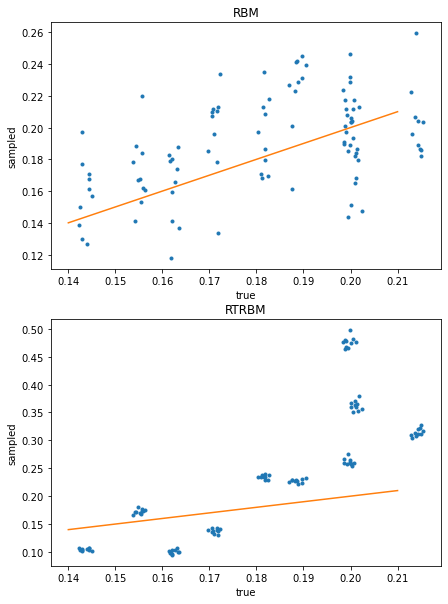

In [488]:
v_rbm_flat = v_rbm.reshape(100, 10000)
v_rtrbm_flat = v_rtrbm.reshape(100, 10000)
h_rtrbm_flat = h_rtrbm.reshape(10, 10000)
h_rbm_flat = h_rbm.reshape(10, 10000)

V_data_mean = torch.mean(V, 1)
V_sampled_mean_rbm = torch.mean(v_rbm_flat, 1)
V_sampled_mean_rtrbm = torch.mean(v_rtrbm_flat, 1)

fig, axes = plt.subplots(2, 1, figsize=(7,10))
axes[0].plot(V_data_mean, V_sampled_mean_rbm.cpu(), '.')
axes[0].plot([.14, .21], [.14, .21], '-')
axes[0].set_title('RBM')
axes[0].set_xlabel('true')
axes[0].set_ylabel('sampled')
axes[1].plot(V_data_mean, V_sampled_mean_rtrbm.cpu(), '.')
axes[1].plot([.14, .21], [.14, .21], '-')
axes[1].set_title('RTRBM')
axes[1].set_xlabel('true')
axes[1].set_ylabel('sampled')

<AxesSubplot:>

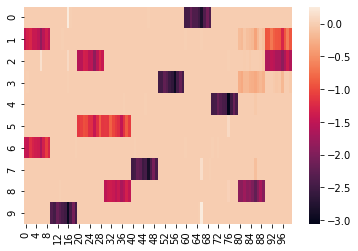

In [531]:
sns.heatmap(rtrbm.W.cpu())

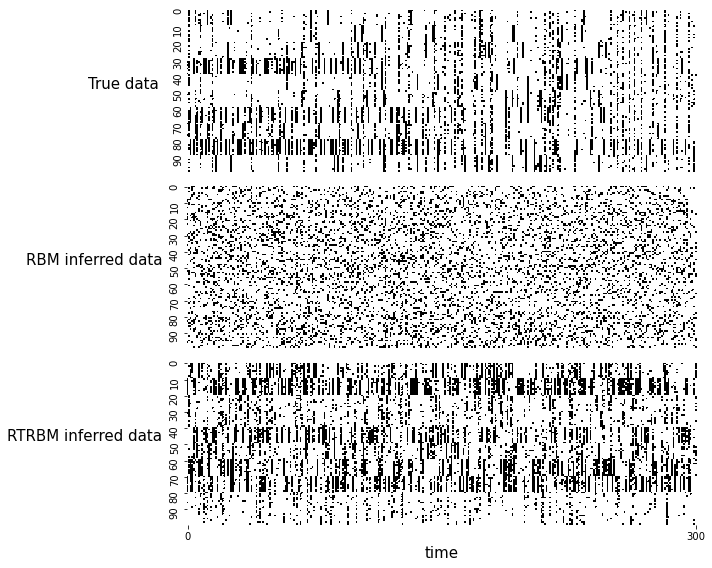

In [674]:
fig, axes = plt.subplots(3, 1, figsize=(10, 8))
sns.heatmap(V[:, 5000:5301], ax=axes[0], cbar=False, cmap=cmap, yticklabels=10, xticklabels=False)
axes[0].tick_params(axis='both', which='both', length=0)
sns.heatmap(v_rbm_flat[:, 5000:5301], ax=axes[1], cbar=False, cmap=cmap, yticklabels=10, xticklabels=False)
axes[1].tick_params(bottom=False)
sns.heatmap(v_rtrbm_flat[:, 5000:5301].cpu(), ax=axes[2], cbar=False, cmap=cmap, yticklabels=10, xticklabels=300)
#axes[2].tick_params(bottom=False)

#axes[0].set_title('Visible neuron traces', fontsize=20)
axes[0].set_ylabel('True data', rotation=0, labelpad=50, fontsize=15)
axes[1].set_ylabel('RBM inferred data', rotation=0, labelpad=75, fontsize=15)
axes[2].set_ylabel('RTRBM inferred data', rotation=0, labelpad=85, fontsize=15)
axes[2].set_xlabel('time', fontsize=15)
plt.tight_layout()

#plt.savefig(r'C:\Users\CP\OneDrive\RU\Intern\rtrbm_master\figures\visible_neuron_traces.png', dpi=500)

In [491]:
V.shape

torch.Size([100, 175000])

In [490]:
import scipy

r_rbm = scipy.stats.pearsonr(V_data_mean, V_sampled_mean_rbm.cpu())
r_rtrbm = scipy.stats.pearsonr(V_data_mean, V_sampled_mean_rtrbm.cpu())

print(r_rbm)
print(r_rtrbm)

(0.4817181087843323, 3.8932715200169846e-07)
(0.8045274372397437, 6.642900988597237e-24)


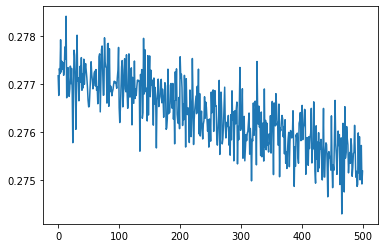

In [485]:
plt.plot(rtrbm2.errors)

<AxesSubplot:>

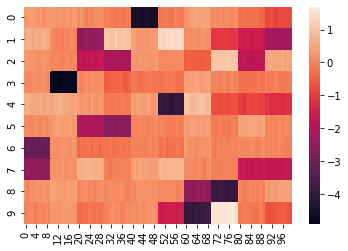

In [486]:
sns.heatmap(rtrbm2.W.cpu())

In [351]:
torch.mean((h_rtrbm_flat[reshape, :] - 1)*-1, 1)

tensor([0.4650, 0.5012, 0.3484, 0.4321, 0.4604, 0.4599, 0.3548, 0.4195, 0.4268,
        0.3200])

<AxesSubplot:>

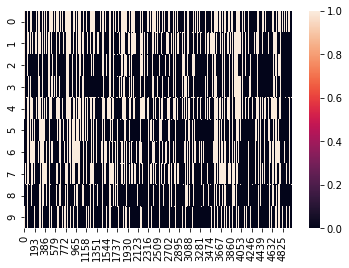

In [340]:
sns.heatmap(spikes_train[:,5000:10000] > 0.1)

<AxesSubplot:>

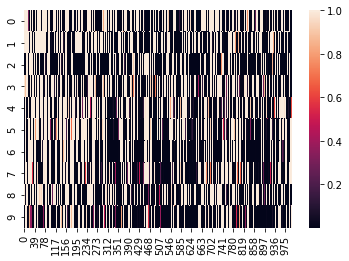

In [347]:
sns.heatmap((h_rtrbm_flat[reshape, :1000] - 1)*-1)

# More hiddens!!

In [553]:
from boltzmann_machines.RTRBM_no_bias import RTRBM_nobias

In [659]:
rtrbm4 = RTRBM(train, N_H=50, device='cuda')
rtrbm4.learn(n_epochs=1000, mom=0.7, wc=0.0002, lr=1e-3, sp=3e-5, x=2, batchsize=10)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [51:07<00:00,  3.07s/it]


In [709]:
from boltzmann_machines.RBM_ import RBM
rbm4 = RBM(train, N_H=50, device='cuda')
rbm4.learn(n_epochs=1000, mom=0.7, wc=0.0002, lr=1e-3, sp=3e-5, x=2, batchsize=10)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [22:10<00:00,  1.33s/it]


In [719]:
rbm4.learn(n_epochs=1000, mom=0.7, wc=0.0002, lr=2e-3, sp=3e-5, x=2, batchsize=10)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [24:38<00:00,  1.48s/it]


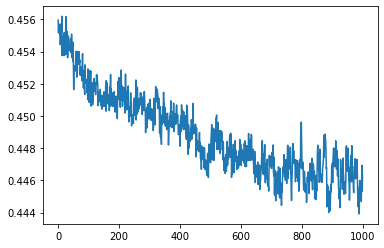

In [720]:
plt.plot(rbm4.errors.cpu())

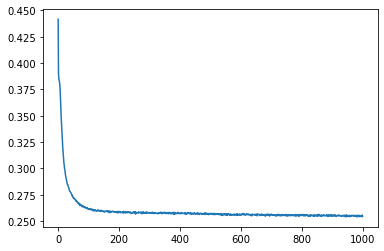

In [660]:
plt.plot(rtrbm4.errors)

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:13<00:00, 14.87it/s]


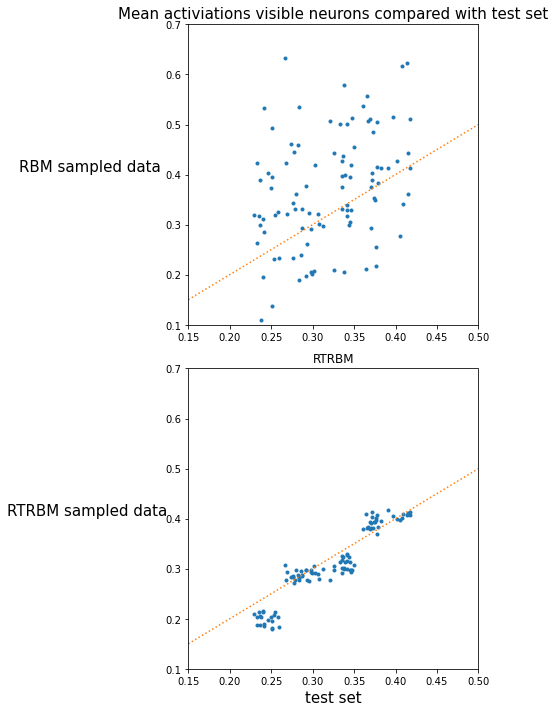

In [729]:
chain=80
MC_chains=200
N_H=50
device='cuda'
v_rtrbm = torch.zeros(100, chain, MC_chains, device=device)
h_rtrbm = torch.zeros(N_H, chain, MC_chains, device=device)
v_rbm = torch.zeros(100, chain, MC_chains, device=device)
h_rbm = torch.zeros(N_H, chain, MC_chains, device=device)

for i in tqdm(range(MC_chains)):
    j = torch.randint(0, 2, (100,), dtype=torch.float)
    v_rtrbm[:, :, i], h_rtrbm[:, :, i] = sample(rtrbm4, j.to(device), chain=chain, pre_gibbs_k=0, mode=1, gibbs_k=1, disable_tqdm=True)
    v_rbm[:, :, i], h_rbm[:, :, i] = rbm4.sample(j.to(device), chain=chain, pre_gibbs_k=0, mode=1, gibbs_k=1, disable_tqdm=True)

v_rtrbm_flat = v_rtrbm.reshape(100, chain*MC_chains)
h_rtrbm_flat = h_rtrbm.reshape(N_H, chain*MC_chains)
v_rbm_flat = v_rbm.reshape(100, chain*MC_chains)
h_rbm_flat = h_rbm.reshape(N_H, chain*MC_chains)


V_data_mean = torch.mean(test, (1, 2)).cpu()
V_sampled_mean_rbm = torch.mean(v_rbm_flat, 1)
V_sampled_mean_rtrbm = torch.mean(v_rtrbm, (1, 2))



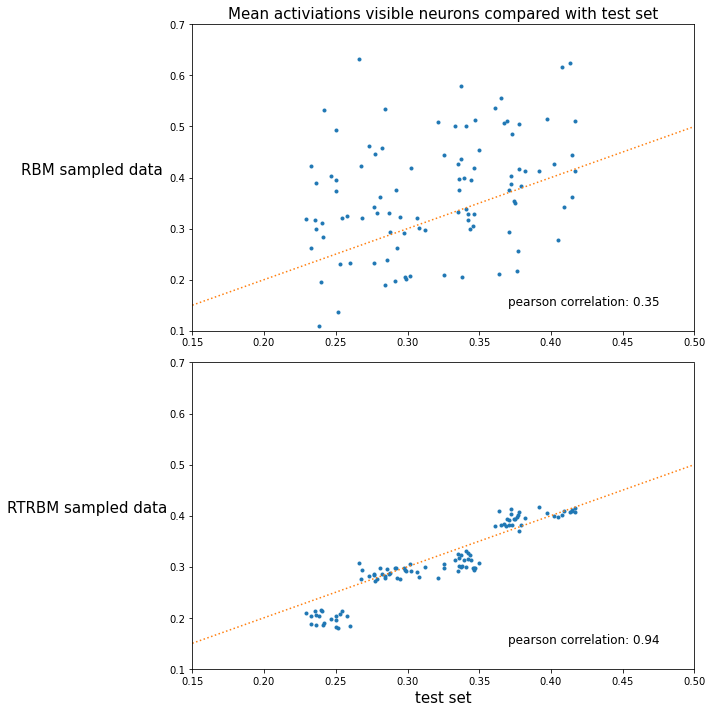

In [744]:
r_rbm, _ = scipy.stats.pearsonr(V_data_mean.cpu(), V_sampled_mean_rbm.cpu())
r_rtrbm, _ = scipy.stats.pearsonr(V_data_mean.cpu(), V_sampled_mean_rtrbm.cpu())
fig, axes = plt.subplots(2, 1, figsize=(10,10))
axes[0].plot(V_data_mean, V_sampled_mean_rbm.cpu(), '.')
axes[0].plot([.15, .5], [.15, .5], ':')
axes[0].set_xlim([.15, .5])
axes[0].set_ylim([.1, .7])
axes[0].text(.37, .15, 'pearson correlation: {:.2f}'.format(r_rbm), fontsize=12)
axes[0].set_title('Mean activiations visible neurons compared with test set', fontsize=15)
axes[0].set_ylabel('RBM sampled data', fontsize=15, rotation=0, labelpad=77)
axes[1].plot(V_data_mean, V_sampled_mean_rtrbm.cpu(), '.')
axes[1].plot([.15, .5], [.15, .5], ':')
axes[1].set_xlim([.15, .5])
axes[1].set_ylim([.1, .7])
axes[1].set_xlabel('test set', fontsize=15)
axes[1].set_ylabel('RTRBM sampled data', fontsize=15, rotation=0, labelpad=82)
axes[1].text(.37, .15, 'pearson correlation: {:.2f}'.format(r_rtrbm), fontsize=12)
plt.tight_layout()
plt.savefig(r'C:\Users\CP\OneDrive\RU\Intern\rtrbm_master\figures\moments.png', dpi=500)

In [738]:
r_rbm

(0.34911781794988594, 0.00037087397805123427)

<AxesSubplot:>

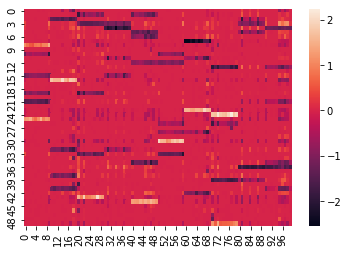

In [684]:
sns.heatmap(rtrbm4.W.cpu())

<AxesSubplot:>

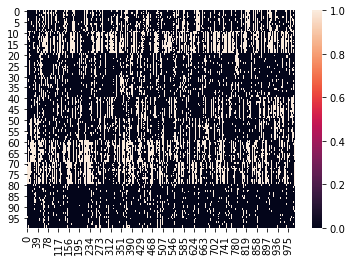

In [673]:
sns.heatmap(v_rtrbm_flat[:, 1000:2000].cpu())

In [ ]:
v_rtrbm = torch.zeros(100, 10, 1000, device='cuda')
h_rtrbm = torch.zeros(10, 10, 1000, device='cuda')

for i in tqdm(range(1000)):
    j = torch.randint(0, 1000, (1,))
    v_rtrbm[:, :, i], h_rtrbm[:, :, i] = rtrbm2.sample(V[:, j].T.to('cuda'), chain=10, pre_gibbs_k=500, gibbs_k=100, disable_tqdm=True)

In [665]:
def sample(self,
           v_start,
           AF=torch.sigmoid,
           chain=50,
           pre_gibbs_k=100,
           gibbs_k=20,
           mode=1,
           disable_tqdm=False):

    vt = torch.zeros(self.N_V, chain, dtype=self.dtype, device=self.device)
    rt = torch.zeros(self.N_H, chain, dtype=self.dtype, device=self.device)

    rt[:, 0] = AF(torch.matmul(self.W, v_start) + self.b_init).reshape(50,)
    vt[:, 0] = v_start
    for t in tqdm(range(1, chain), disable=disable_tqdm):
        v = vt[:, t - 1]

        # it is important to keep the burn-in inside the chain loop, because we now have time-dependency
        for kk in range(pre_gibbs_k):
            h = torch.bernoulli(AF(torch.matmul(self.W, v).T + self.b_H + torch.matmul(self.W_acc, rt[:, t - 1]))).T
            v = torch.bernoulli(AF(torch.matmul(self.W.T, h) + self.b_V.T))

        vt_k = torch.zeros(self.N_V, gibbs_k, dtype=self.dtype, device=self.device)
        ht_k = torch.zeros(self.N_H, gibbs_k, dtype=self.dtype, device=self.device)
        for kk in range(gibbs_k):
            h = torch.bernoulli(AF(torch.matmul(self.W, v).T + self.b_H + torch.matmul(self.W_acc, rt[:, t - 1]))).T
            v = torch.bernoulli(AF(torch.matmul(self.W.T, h) + self.b_V.T))
            vt_k[:, kk] = v.T
            ht_k[:, kk] = h.T

        if mode == 1:
            vt[:, t] = vt_k[:, -1]
        if mode == 2:
            vt[:, t] = torch.mean(vt_k, 1)
        if mode == 3:
            E = torch.sum(ht_k * (torch.matmul(self.W, vt_k)), 0) + torch.matmul(self.b_V, vt_k) + torch.matmul(
                self.b_H, ht_k) + torch.matmul(torch.matmul(self.W_acc, rt[:, t - 1]).T, ht_k)
            idx = torch.argmax(E)
            vt[:, t] = vt_k[:, idx]

        rt[:, t] = AF(torch.matmul(self.W, vt[:, t]) + self.b_H + torch.matmul(self.W_acc, rt[:, t - 1]))

    return vt, rt


# Better data

In [745]:
dataset = pickle.load(open(path + '\Hidden_trace_4', 'rb'))
[N, C_E, C_I, EI, IE, resolution, T, dt, T_step, spikes_true, spikes_train, spike_thres, I_inj, V, h] = dataset
h = torch.tensor(h, dtype=torch.float, device=device)

<AxesSubplot:>

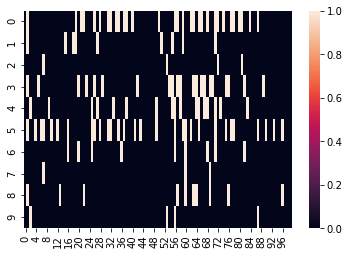

In [750]:
sns.heatmap(h[:,:100].cpu())

In [755]:
h_train, h_test = train_test_split(h, 80, 20)

In [766]:
h_train.shape

torch.Size([10, 10, 80])

In [757]:
rtrbm5 = RTRBM(h_train, N_H=10 ,device='cpu')

In [760]:
rtrbm5.learn(n_epochs=1000, mom=0.7, wc=0.0002, lr=1e-3, sp=3e-5, x=2, start_decay = 100, lr_end=5e-5, batchsize=10)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [05:07<00:00,  3.26it/s]


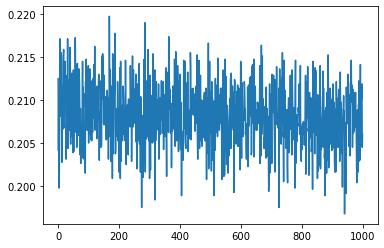

In [761]:
plt.plot(rtrbm5.errors)

<AxesSubplot:>

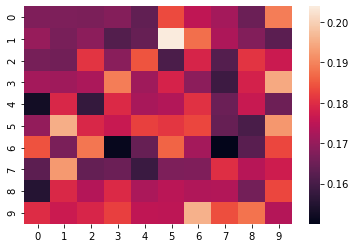

In [763]:
sns.heatmap(rtrbm5.W_acc)

In [768]:
rtrbm_gen = RTRBM(torch.zeros(100, 100, 8), N_H=10, device='cuda')

In [774]:
rtrbm_gen.W = generated.W.to('cuda')
rtrbm_gen.b_init = torch.zeros(1, 10, device='cuda')
rtrbm_gen.b_V = torch.zeros(1, 100, device='cuda')
rtrbm_gen.b_H = torch.zeros(1, 10, device='cuda')

In [803]:
v_new = rtrbm_gen.hidden_to_visible(h.to('cuda'))
for i in range(9):
    v_new = torch.cat((v_new, rtrbm_gen.hidden_to_visible(h.to('cuda'))), 1)

In [804]:
v_new.shape

torch.Size([100, 10000])

<AxesSubplot:>

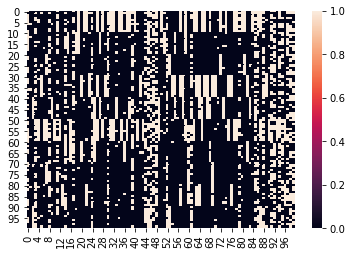

In [778]:
sns.heatmap(v_new[:,:100].cpu())

In [805]:
v_train, v_test = train_test_split(v_new, 80, 20)

In [814]:
rtrbm6 = RTRBM(v_train, N_H = 10)
rtrbm6.learn(n_epochs=500, mom=0, wc=0, lr=1e-3, sp=3e-5, x=2, start_decay=2000, lr_end=1e-4, batchsize=8)

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [21:12<00:00,  2.54s/it]


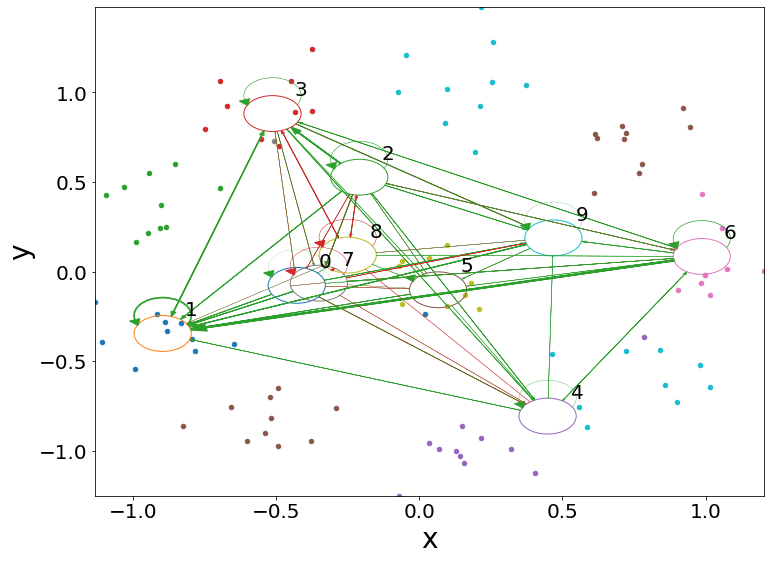

Text(0.5, 1.0, 'Hidden structure of trained RTRBM')

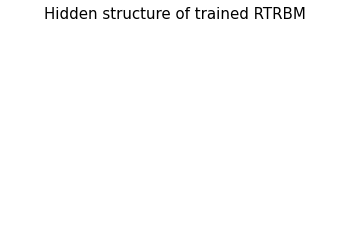

In [832]:
from utils.visualize_hidden_network import create_plot
rf = get_hidden_mean_receptive_fields(-rtrbm6.W.cpu(), coordinates.cpu(), only_max_conn=False)

create_plot(-rtrbm6.W.cpu(), rtrbm6.W_acc.cpu(), rf.cpu(),  coordinates, 0, weight_line_factor=0.25, hiddens_radius=0.1, hidden_weight_thresh=0)
plt.axis('off')

plt.title('Hidden structure of trained RTRBM', fontsize=15)
#plt.savefig(r'C:\Users\CP\OneDrive\RU\Intern\rtrbm_master\figures\hidden_structure_no_arrows.png', dpi=500)

<AxesSubplot:>

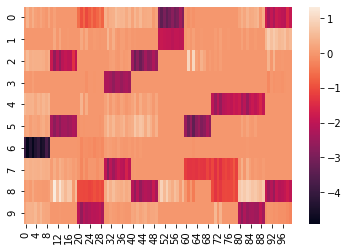

In [821]:
sns.heatmap(rtrbm6.W.cpu())

<AxesSubplot:>

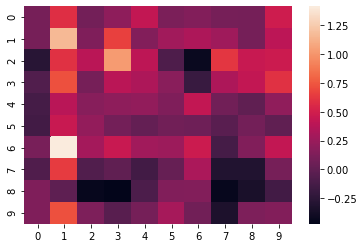

In [822]:
sns.heatmap(rtrbm6.W_acc.cpu())

In [828]:
U = torch.zeros(10,10)
for i, g in enumerate(EI):
    U[i, g] = 1
    
for i, g in enumerate(IE):
    U[i, g] = -1

<AxesSubplot:>

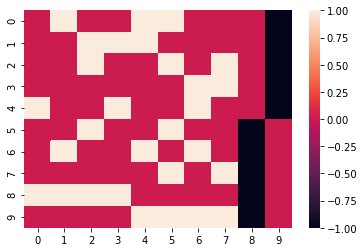

In [829]:
sns.heatmap(U)

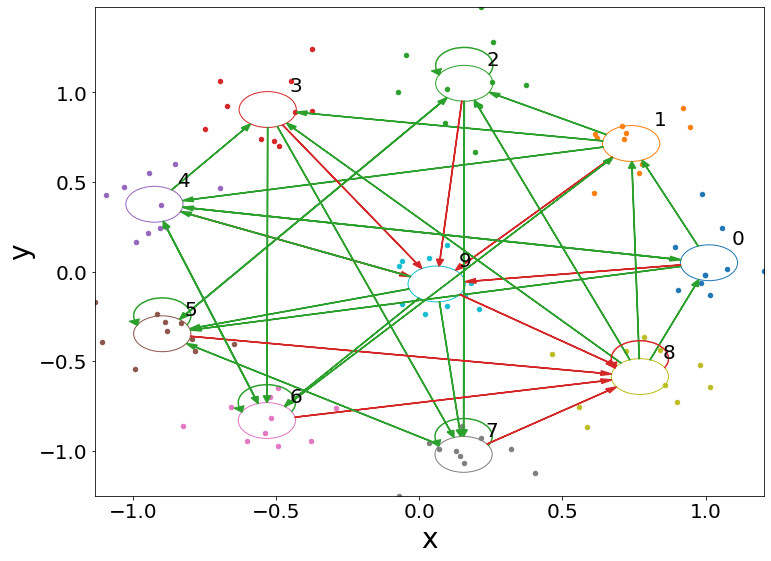

(0.0, 1.0, 0.0, 1.0)

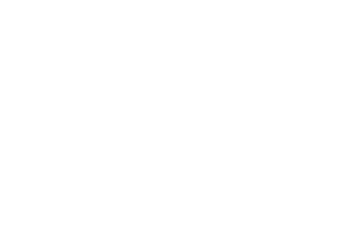

In [833]:
rf = get_hidden_mean_receptive_fields(generated.W.cpu(), coordinates, only_max_conn=True)

create_plot(generated.W.cpu(), U, rf.cpu(),  coordinates, 0, weight_line_factor=0.25, hiddens_radius=0.1, hidden_weight_thresh=0)
plt.axis('off')

In [889]:
from boltzmann_machines.RTRBM_no_bias import RTRBM_nobias
rtrbm7 = RTRBM_nobias(v_train, N_H = 10)
rtrbm7.W = generated.W.to('cuda')
W_acc7 = torch.zeros(10,10,100)
for i in tqdm(range(100)):
    rtrbm7.learn(n_epochs=10, mom=0, wc=0, lr=1e-3, batchsize=8, disable_tqdm=True)
    W_acc7[:,:,i] = rtrbm7.W_acc.cpu()

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [25:10<00:00, 15.10s/it]


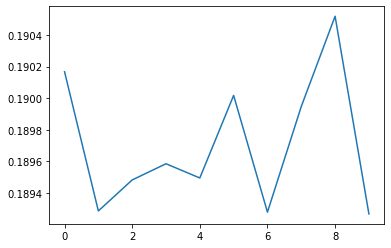

In [890]:
plt.plot(rtrbm7.errors)

<AxesSubplot:>

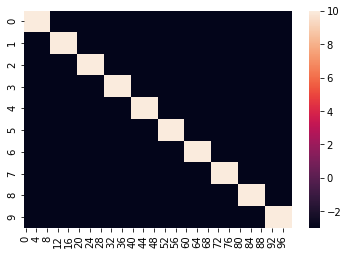

In [843]:
sns.heatmap(rtrbm7.W.cpu())

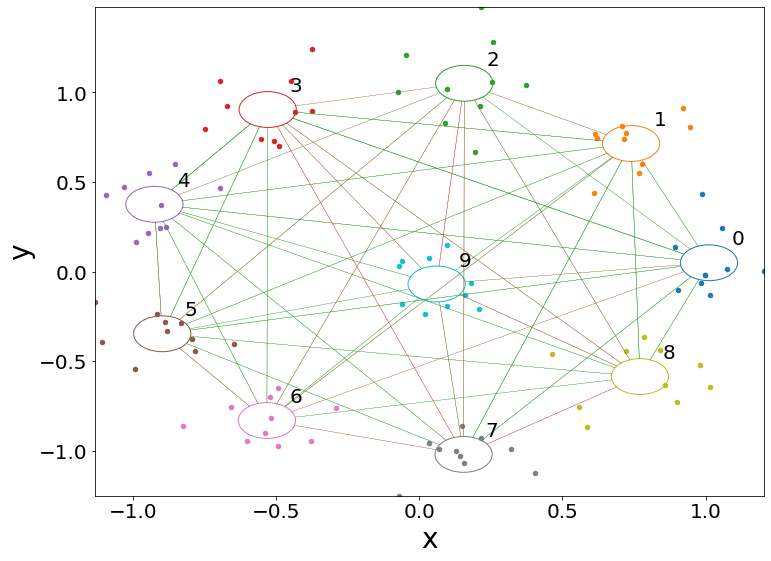

(0.0, 1.0, 0.0, 1.0)

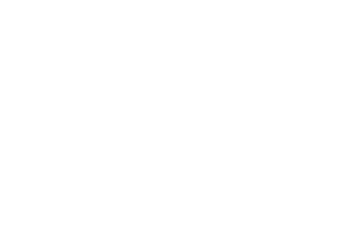

In [894]:
rf = get_hidden_mean_receptive_fields(rtrbm7.W.cpu(), coordinates, only_max_conn=True)

create_plot(rtrbm7.W.cpu(), W_acc7[:,:,20], rf.cpu(),  coordinates, 0, weight_line_factor=.5, hiddens_radius=0.1, hidden_weight_thresh=0)
plt.axis('off')

In [851]:
%matplotlib inline

<AxesSubplot:>

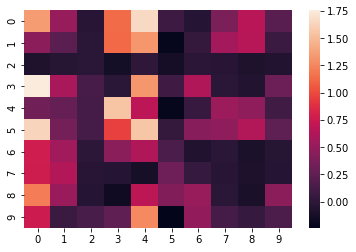

In [866]:
sns.heatmap(W_acc7[:,:,49])

In [891]:
dw = torch.zeros(48,1)
for i in range(48):
    dw[i] = torch.sum(W_acc7[:,:,i] - W_acc7[:,:,i+1])

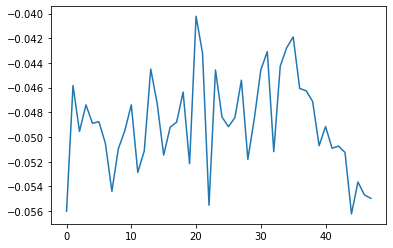

In [892]:
plt.plot(dw)

<AxesSubplot:>

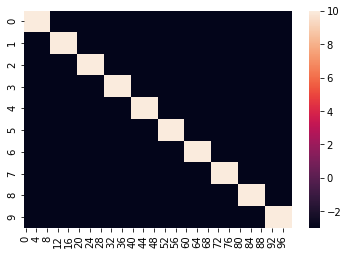

In [867]:
sns.heatmap(rtrbm7.W.cpu())

### Plotting 2d density plots of moments of 80 populations artificual data

In [13]:
import torch
import numpy as np
from tqdm.notebook import tqdm
from utils.plots import moments
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize
from scipy.interpolate import interpn


#### The density plotter:

In [60]:
def density_scatter(x , y, ax = None, fig=None, r=None, sort = True, bins = 20, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    if ax is None :
        fig , ax = plt.subplots()
    data , x_e, y_e = np.histogram2d( x, y, bins = bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)

    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0

    # Sort the points by density, so that the densest points are plotted last
    if sort :
        idx = z.argsort()
        x, y, z = x[idx], y[idx], z[idx]

    ax.scatter( x, y, c=z, s=2, **kwargs )

    norm = Normalize(vmin = np.min(z), vmax = np.max(z))
    cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
    cbar.ax.set_ylabel('Density')
    ax.plot([0, 1], [0, 1], ':')
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.text(.1, .85, 'r-value: {:.2f}'.format(r))

    return ax

In [51]:
v_sampled_rtrbm, h_sampled_rtrbm, v_sampled_rbm, h_sampled_rbm, v_data_rtrbm, h_data_rtrbm, v_data_rbm, h_data_rbm = torch.load(open(r'D:\OneDrive\RU\Intern\rtrbm_master\results\infer_5_samples_80pop', 'rb'))

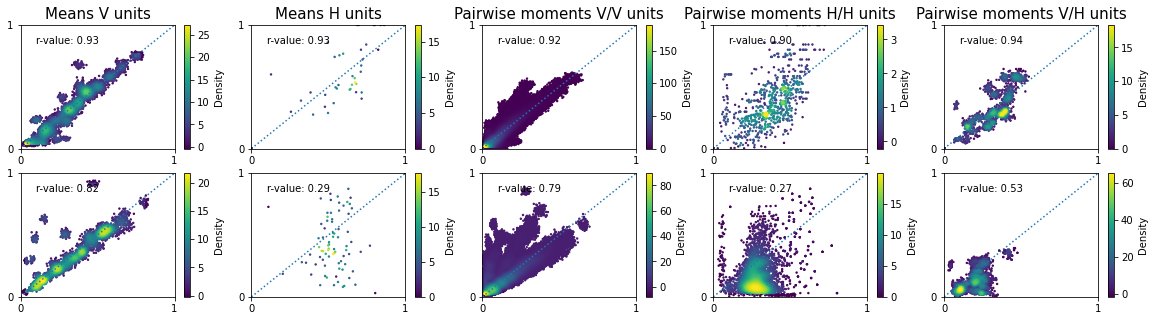

In [61]:
# calculate moments
means_V_data_rtrbm, means_V_samples_rtrbm, means_H_data_rtrbm, means_H_samples_rtrbm, \
pw_VV_data_rtrbm, pw_VV_samples_rtrbm, pw_HH_data_rtrbm, pw_HH_samples_rtrbm, pw_VH_data_rtrbm, \
pw_VH_samples_rtrbm, r_V_rtrbm, r_H_rtrbm, r_VV_rtrbm, r_VH_rtrbm, r_HH_rtrbm = moments(v_data_rtrbm, h_data_rtrbm, v_sampled_rtrbm, h_sampled_rtrbm)

means_V_data_rbm, means_V_samples_rbm, means_H_data_rbm, means_H_samples_rbm, \
pw_VV_data_rbm, pw_VV_samples_rbm, pw_HH_data_rbm, pw_HH_samples_rbm, pw_VH_data_rbm, \
pw_VH_samples_rbm, r_V_rbm, r_H_rbm, r_VV_rbm, r_VH_rbm, r_HH_rbm = moments(v_data_rbm, h_data_rbm, v_sampled_rbm, h_sampled_rbm)

print('Done calculating moments! Now plotting...')

fig, axes = plt.subplots(2, 5, figsize=(20, 5))

density_scatter(np.array(means_V_data_rtrbm), np.array(means_V_samples_rtrbm), r=r_V_rtrbm, ax=axes[0, 0], fig=fig)
axes[0, 0].set_title('Means V units', fontsize=15)
density_scatter(np.array(means_H_data_rtrbm), np.array(means_H_samples_rtrbm), r=r_H_rtrbm, ax=axes[0, 1], fig=fig)
axes[0, 1].set_title('Means H units', fontsize=15)
idx = torch.randperm(pw_VV_data_rbm.shape[0])[:500000]
density_scatter(np.array(pw_VV_data_rtrbm[idx]), np.array(pw_VV_samples_rtrbm[idx]), r=r_VV_rtrbm, ax=axes[0, 2], fig=fig)
axes[0, 2].set_title('Pairwise moments V/V units', fontsize=15)
density_scatter(np.array(pw_HH_data_rtrbm), np.array(pw_HH_samples_rtrbm), r=r_HH_rtrbm, ax=axes[0, 3], fig=fig)
axes[0, 3].set_title('Pairwise moments H/H units', fontsize=15)
density_scatter(np.array(pw_VH_data_rtrbm), np.array(pw_VH_samples_rtrbm), r=r_VH_rtrbm, ax=axes[0, 4], fig=fig)
axes[0, 4].set_title('Pairwise moments V/H units', fontsize=15)
density_scatter(np.array(means_V_data_rbm), np.array(means_V_samples_rbm), r=r_V_rbm, ax=axes[1, 0], fig=fig)
density_scatter(np.array(means_H_data_rbm), np.array(means_H_samples_rbm), r=r_H_rbm, ax=axes[1, 1], fig=fig)
density_scatter(np.array(pw_VV_data_rbm[idx]), np.array(pw_VV_samples_rbm[idx]), r=r_VV_rbm, ax=axes[1, 2], fig=fig)
density_scatter(np.array(pw_HH_data_rbm), np.array(pw_HH_samples_rbm), r=r_HH_rbm, ax=axes[1, 3], fig=fig)
density_scatter(np.array(pw_VH_data_rbm), np.array(pw_VH_samples_rbm), r=r_VH_rbm, ax=axes[1, 4], fig=fig)

plt.savefig(r'D:\OneDrive\RU\Intern\rtrbm_master\figures\moments_80pop.png', dpi=500)

### More batches

In [67]:
v_sampled_rtrbm, h_sampled_rtrbm, v_data_rtrbm, h_data_rtrbm, = torch.load(open(r'D:\OneDrive\RU\Intern\rtrbm_master\results\Poisson Artificial Data\80 populations\rtrbm_80pop_infer_all_batches', 'rb'))
v_sampled_rbm, h_sampled_rbm, v_data_rbm, h_data_rbm, = torch.load(open(r'D:\OneDrive\RU\Intern\rtrbm_master\results\Poisson Artificial Data\80 populations\rbm_80pop_infer_all_batches', 'rb'))

Done calculating moments! Now plotting...


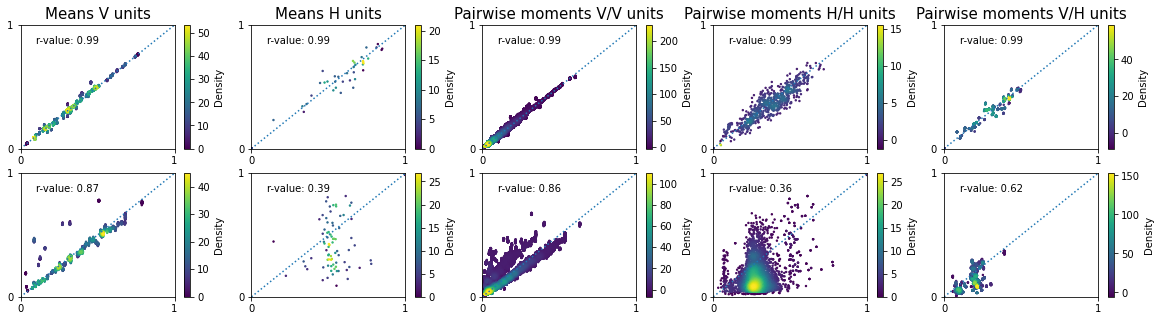

In [68]:
# calculate moments
means_V_data_rtrbm, means_V_samples_rtrbm, means_H_data_rtrbm, means_H_samples_rtrbm, \
pw_VV_data_rtrbm, pw_VV_samples_rtrbm, pw_HH_data_rtrbm, pw_HH_samples_rtrbm, pw_VH_data_rtrbm, \
pw_VH_samples_rtrbm, r_V_rtrbm, r_H_rtrbm, r_VV_rtrbm, r_VH_rtrbm, r_HH_rtrbm = moments(v_data_rtrbm, h_data_rtrbm, v_sampled_rtrbm, h_sampled_rtrbm)

means_V_data_rbm, means_V_samples_rbm, means_H_data_rbm, means_H_samples_rbm, \
pw_VV_data_rbm, pw_VV_samples_rbm, pw_HH_data_rbm, pw_HH_samples_rbm, pw_VH_data_rbm, \
pw_VH_samples_rbm, r_V_rbm, r_H_rbm, r_VV_rbm, r_VH_rbm, r_HH_rbm = moments(v_data_rbm, h_data_rbm, v_sampled_rbm, h_sampled_rbm)

print('Done calculating moments! Now plotting...')

fig, axes = plt.subplots(2, 5, figsize=(20, 5))

density_scatter(np.array(means_V_data_rtrbm), np.array(means_V_samples_rtrbm), r=r_V_rtrbm, ax=axes[0, 0], fig=fig)
axes[0, 0].set_title('Means V units', fontsize=15)
density_scatter(np.array(means_H_data_rtrbm), np.array(means_H_samples_rtrbm), r=r_H_rtrbm, ax=axes[0, 1], fig=fig)
axes[0, 1].set_title('Means H units', fontsize=15)
idx = torch.randperm(pw_VV_data_rbm.shape[0])[:500000]
density_scatter(np.array(pw_VV_data_rtrbm[idx]), np.array(pw_VV_samples_rtrbm[idx]), r=r_VV_rtrbm, ax=axes[0, 2], fig=fig)
axes[0, 2].set_title('Pairwise moments V/V units', fontsize=15)
density_scatter(np.array(pw_HH_data_rtrbm), np.array(pw_HH_samples_rtrbm), r=r_HH_rtrbm, ax=axes[0, 3], fig=fig)
axes[0, 3].set_title('Pairwise moments H/H units', fontsize=15)
density_scatter(np.array(pw_VH_data_rtrbm), np.array(pw_VH_samples_rtrbm), r=r_VH_rtrbm, ax=axes[0, 4], fig=fig)
axes[0, 4].set_title('Pairwise moments V/H units', fontsize=15)
density_scatter(np.array(means_V_data_rbm), np.array(means_V_samples_rbm), r=r_V_rbm, ax=axes[1, 0], fig=fig)
density_scatter(np.array(means_H_data_rbm), np.array(means_H_samples_rbm), r=r_H_rbm, ax=axes[1, 1], fig=fig)
density_scatter(np.array(pw_VV_data_rbm[idx]), np.array(pw_VV_samples_rbm[idx]), r=r_VV_rbm, ax=axes[1, 2], fig=fig)
density_scatter(np.array(pw_HH_data_rbm), np.array(pw_HH_samples_rbm), r=r_HH_rbm, ax=axes[1, 3], fig=fig)
density_scatter(np.array(pw_VH_data_rbm), np.array(pw_VH_samples_rbm), r=r_VH_rbm, ax=axes[1, 4], fig=fig)

plt.savefig(r'D:\OneDrive\RU\Intern\rtrbm_master\figures\moments_80pop_allbatches.png', dpi=500)